In [2]:
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/National%20Stock%20Exchange%20Dataset%20-%20Banking%20Sectors/NSE_BANKING_SECTOR.csv")

In [4]:
df.head(5)

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41231 entries, 0 to 41230
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                41231 non-null  object 
 1   SYMBOL              41231 non-null  object 
 2   SERIES              41231 non-null  object 
 3   PREV CLOSE          41231 non-null  float64
 4   OPEN                41231 non-null  float64
 5   HIGH                41231 non-null  float64
 6   LOW                 41231 non-null  float64
 7   LAST                41231 non-null  float64
 8   CLOSE               41231 non-null  float64
 9   VWAP                41231 non-null  float64
 10  VOLUME              41231 non-null  int64  
 11  TURNOVER            41231 non-null  float64
 12  TRADES              41231 non-null  int64  
 13  DELIVERABLE VOLUME  41231 non-null  int64  
 14  %DELIVERBLE         41231 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 4.7+

In [6]:
df.describe()

,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
count,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,41231.000000
mean,291.962753,292.350947,296.518484,287.723448,291.993606,292.013088,292.160731,1.042650e+07,1.953615e+14,5.221812e+04,3.026935e+06,0.415416
std,452.541028,452.967892,458.224757,447.069432,452.717343,452.732064,452.655314,2.953972e+07,4.038675e+14,8.851021e+04,9.387528e+06,0.196122
min,4.900000,4.950000,4.950000,4.800000,4.900000,4.900000,4.910000,9.194000e+03,1.681628e+10,9.400000e+01,7.392000e+03,0.020100
25%,37.150000,37.300000,37.975000,36.450000,37.100000,37.100000,37.230000,8.216770e+05,5.730684e+12,5.398000e+03,3.457530e+05,0.252700
50%,101.900000,102.000000,103.800000,99.800000,101.750000,101.850000,102.020000,2.777826e+06,4.025961e+13,1.928000e+04,9.584380e+05,0.414700
75%,305.675000,306.125000,311.400000,301.050000,305.775000,305.675000,306.280000,9.769572e+06,2.041632e+14,6.297200e+04,2.928749e+06,0.563200
max,2860.450000,2871.000000,2896.000000,2838.000000,2861.550000,2860.450000,2867.920000,1.264918e+09,1.498222e+16,1.788274e+06,7.870864e+08,1.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Correlation Heatmap')

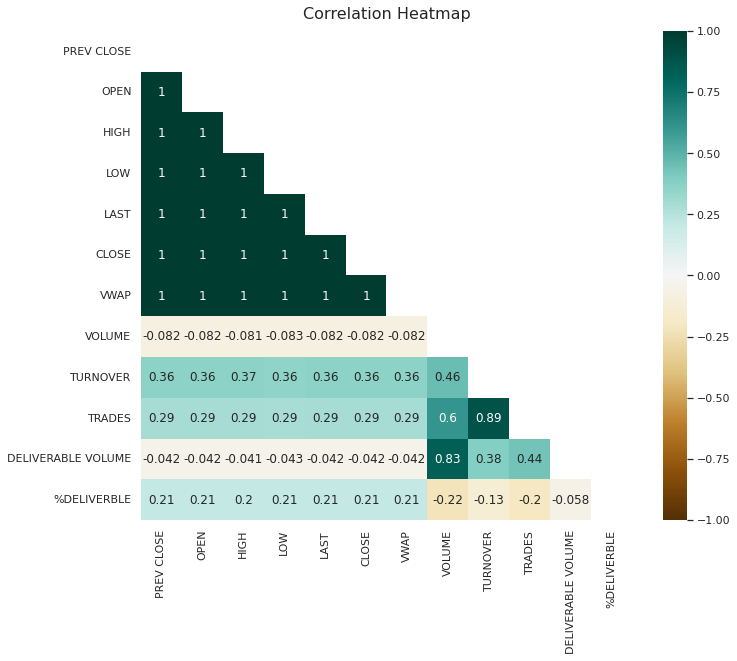

In [7]:
sns.set_theme(style="white")

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))

heatmap = sns.heatmap(corr, cmap='BrBG', mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)

In [8]:
banks_list = df['SYMBOL'].unique().tolist()
df['DATE'] = pd.to_datetime(df['DATE'])
grouped_data = df.groupby('SYMBOL')
groups = grouped_data.groups
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
def calculate_cagr(value_end, value_begin, time_in_years):
    try:
        return round((((value_end/value_begin)**(1/time_in_years)) - 1) * 100, 2)
    except:
        return 0
    return
def get_cagr(grouped_data, bank_list):
    bank_directory = {}
    for bank in bank_list:
        close_prices = []
        dates = []
        df_bank = grouped_data.get_group(bank)
        df_bank.reset_index(drop=True, inplace=True)
        old_date = max(df_bank['DATE'])
        high_date = old_date
        low_date = min(df_bank['DATE'])
        dates.append(old_date)
        close_prices.append(df_bank.loc[df_bank['DATE'] == old_date].CLOSE.values[0])
        for _ in range(5):
            new_date = old_date - relativedelta(years=1)
            if new_date < low_date:
                break
            day = datetime.datetime.strptime(str(new_date), '%Y-%m-%d %H:%M:%S').weekday()
            if day_name[day] == 'Sunday':
                new_date = new_date + relativedelta(days=1)
            elif day_name[day] == 'Saturday':
                new_date = new_date - relativedelta(days=1)
                
            while new_date not in df_bank['DATE'].values:
                new_date = new_date - relativedelta(days=1)
                
            close_prices.append(df_bank.loc[df_bank['DATE'] == new_date].CLOSE.values[0])
            dates.append(new_date)
            old_date = new_date
            
        cagrs = [calculate_cagr(close_prices[i], close_prices[i+1], 1) for i in range(len(close_prices)-1)]
        
        gross_cagr = calculate_cagr(close_prices[0], close_prices[len(close_prices)-1], len(dates))
        
        bank_directory[bank] = {'min_date' : low_date, 'max_date' : high_date, 'gross_cagr' : gross_cagr,
                               'low_price' : min(close_prices) , 'high_price' : max(close_prices), 
                               'dates' : dates, 'cagrs' : cagrs, 'close_prices' : close_prices}
        
    return bank_directory
            
        
bank_dir = get_cagr(grouped_data, banks_list)
keys = list(bank_dir.keys())
gross_cagrs = [float(bank_dir[k]['gross_cagr']) for k in keys]
curr_price = [float(bank_dir[k]['close_prices'][0]) for k in keys]
import plotly.express as px
fig = px.bar(x=keys, y=gross_cagrs, title="Gross Compunded Annual Growth Rate (Since 2016 or Inception)",
            labels={'x':'BANK NAME', 'y': 'CAGR %'}, hover_data={'Current CMP' : curr_price})

fig.show()